# Plotting Relative Runtime of Radiation Calls

## Intro

ICON is run for the same case with different radiation timesteps:

- namelist flag `dt_rad = [900, 60, 120, 240, 480, 1800]`

- A ICON-LEM setup using ECRAD radiation coupling is used. Grid spacing is around 600m. 

- The condensate velocity is around 15 m/s - so quite a bit of wind during this selected case. It take around 40 secounds for a cloud to leave one grid box and enter the neighboring one. Depending on cloud size, advective motion leads to a complete mismatch between clouds at t to clouds t + (a few minutes).

- A reference run is integrated forward from 0z to 9z for each case using `dt_rad = 900` and sensitivity runs are started thereafter from 9z to 10z.

- This is a small ICON setup (5e5 grid cells), just to illustrate the problem in the radiation-cloud coupling.

## Analysis

### Import Libraries 

In [1]:
import numpy as np
import pylab as plt


import seaborn as sns
sns.set_context ('talk')

### Input Data 

This is the order how the sensitivity runs were performed.

In [2]:
dt_rad = np.array([15, 1, 2, 4, 8, 30])

#### Absolute Runtimes  

taken from the logfiles (time in seconds; one hour forward integration on 10 levante nodes (128 cores))

In [3]:
total = np.array([1818, 2168, 2007, 1893, 1832, 1804])
physics = np.array([666, 987, 837, 734, 689, 656])
radiation = np.array([26, 317, 181, 89, 48, 13])

#### Relative Runtimes 

In [4]:
rel_physics = (100.*physics) / total
rel_radiation = (100.*radiation) / total


### Plotting 

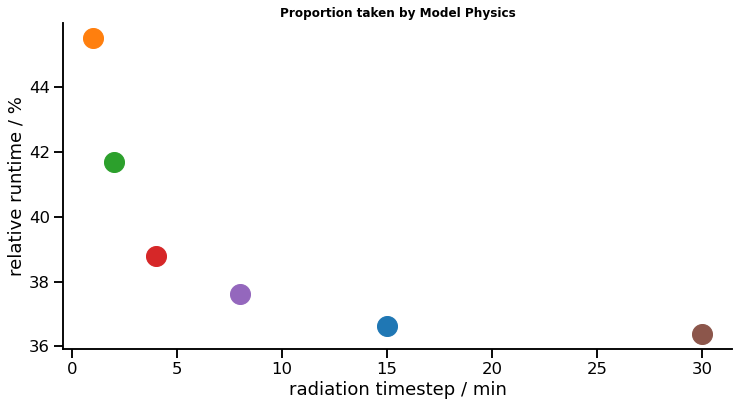

In [5]:
fig = plt.figure(figsize = (12, 6))

for i in range( len(dt_rad)):
    plt.plot( dt_rad[i], rel_physics[i], lw = 0, marker='o', ms = 20 )

plt.xlabel('radiation timestep / min')
plt.ylabel('relative runtime / %')

plt.title( 'Proportion taken by Model Physics', fontweight = 'bold', fontsize = 'large')

sns.despine()

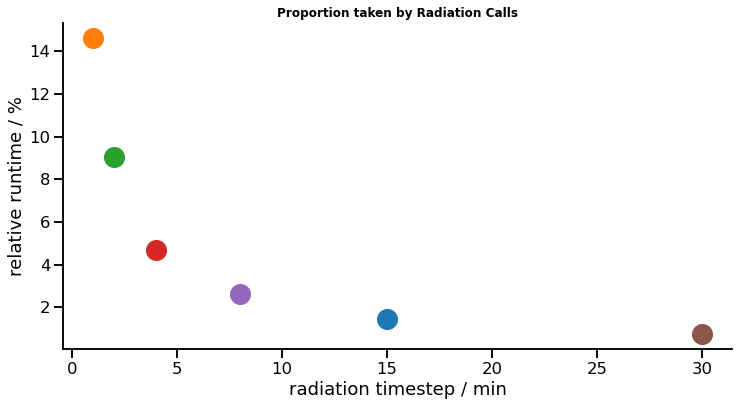

In [6]:
fig = plt.figure(figsize = (12, 6))

for i in range( len(dt_rad)):
    plt.plot( dt_rad[i], rel_radiation[i], lw = 0, marker='o', ms = 20 )

plt.xlabel('radiation timestep / min')
plt.ylabel('relative runtime / %')

plt.title( 'Proportion taken by Radiation Calls', fontweight = 'bold', fontsize = 'large')

sns.despine()

## Conclusions

- only a minor fraction of runtime is needed if radiation is called with longer time steps.
- towards 2 minutes (which is 3 times the time for an advective shift between grid boxes) relative computional burden appraoching 10 %